In [1]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

# Constants
PLAYER_X = 1
PLAYER_O = -1
EMPTY = 0
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration rate
BOARD_SIZE_4x4 = 4
BOARD_SIZE_5x5 = 5

# Function to create an empty board
def create_board(size):
    return np.zeros((size, size), dtype=int)

# Function to check for a winner
def check_winner(board):
    size = board.shape[0]
    for player in [PLAYER_X, PLAYER_O]:
        # Check rows, columns, and diagonals for a win
        for i in range(size):
            if all(board[i, :] == player) or all(board[:, i] == player):
                return player
        if all([board[i, i] == player for i in range(size)]) or all([board[i, size - 1 - i] == player for i in range(size)]):
            return player
    if np.all(board != EMPTY):
        return 0  # Draw
    return None  # Game not finished

class LinearQApproximationAgent:
    def __init__(self, size):
        self.size = size
        self.num_features = size * size
        self.weights = np.random.randn(self.num_features)  # Initialize random weights

    def state_to_features(self, board):
        """Flatten the board as a feature vector."""
        return board.flatten()

    def get_q_value(self, state, action):
        """Get the Q-value for a given state-action pair using linear function approximation."""
        features = self.state_to_features(state)
        action_index = action[0] * self.size + action[1]
        return np.dot(self.weights, features)

    def update_weights(self, state, action, reward, next_state):
        """Update the weights using gradient descent."""
        features = self.state_to_features(state)
        next_features = self.state_to_features(next_state)

        action_index = action[0] * self.size + action[1]
        
        # Q-learning update rule: Q(s,a) += ALPHA * (reward + GAMMA * max(Q(s',a')) - Q(s,a))
        q_value = np.dot(self.weights, features)  # Current Q-value for (state, action)
        max_next_q_value = np.max([np.dot(self.weights, next_features)])  # Max Q-value for next state

        # Compute the target
        target = reward + GAMMA * max_next_q_value
        error = target - q_value

        # Gradient descent update: w = w + alpha * error * feature
        self.weights += ALPHA * error * features

    def get_possible_actions(self, board):
        """Get possible actions (empty cells)."""
        return list(zip(*np.where(board == EMPTY)))

    def choose_action(self, board, player):
        """Epsilon-greedy policy to choose the next action."""
        possible_actions = self.get_possible_actions(board)
        if np.random.rand() < EPSILON:
            # Explore: choose random action
            return possible_actions[np.random.choice(len(possible_actions))]
        else:
            # Exploit: choose the best action based on approximated Q-values
            best_action = None
            best_value = -np.inf
            for action in possible_actions:
                q_value = self.get_q_value(board, action)
                if q_value > best_value:
                    best_value = q_value
                    best_action = action
            return best_action

    def play_game(self, opponent='random'):
        """Simulate a game between the Q-learning agent and a random opponent."""
        board = create_board(self.size)
        player = PLAYER_X
        history = []

        # Initialize the first action
        state = board.copy()
        action = self.choose_action(board, player)

        while True:
            history.append((state.copy(), action))
            board[action] = player

            winner = check_winner(board)
            if winner is not None:
                reward = 1 if winner == PLAYER_X else -1 if winner == PLAYER_O else 0
                self.update_weights(state, action, reward, board)  # Final step
                return winner

            # Switch player
            player = -player

            # If opponent is random
            if opponent == 'random':
                # Opponent (PLAYER_O) random action
                if player == PLAYER_O:
                    opponent_action = random.choice(self.get_possible_actions(board))
                    board[opponent_action] = PLAYER_O
                    winner = check_winner(board)
                    if winner is not None:
                        reward = -1 if winner == PLAYER_O else 0
                        self.update_weights(state, action, reward, board)
                        return winner
                    player = -player  # Switch back to agent

            # Next state and action for the Q-learning agent
            next_state = board.copy()
            reward = 0  # No reward for intermediate steps

            self.update_weights(state, action, reward, next_state)

            # Update state and action for the next iteration
            state = next_state
            action = self.choose_action(board, PLAYER_X)

    def train(self, episodes):
        win_count = 0
        win_rates = []

        for episode in range(episodes):
            winner = self.play_game()
            if winner == PLAYER_X:
                win_count += 1

            if (episode + 1) % 100 == 0:
                win_rate = win_count / (episode + 1)
                win_rates.append(win_rate)
                print(f"Episode {episode + 1}: Win rate = {win_rate:.3f}")

        return win_rates

def plot_win_rate(win_rates, board_size):
    plt.plot(win_rates)
    plt.xlabel('Episodes (x100)')
    plt.ylabel('Win Rate')
    plt.title(f'Agent Win Rate Over Time (Board Size: {board_size}x{board_size})')
    plt.show()



Episode 100: Win rate = 0.640
Episode 200: Win rate = 0.660
Episode 300: Win rate = 0.670
Episode 400: Win rate = 0.677
Episode 500: Win rate = 0.678
Episode 600: Win rate = 0.677
Episode 700: Win rate = 0.681
Episode 800: Win rate = 0.677
Episode 900: Win rate = 0.679
Episode 1000: Win rate = 0.681
Episode 1100: Win rate = 0.680
Episode 1200: Win rate = 0.682
Episode 1300: Win rate = 0.678
Episode 1400: Win rate = 0.671
Episode 1500: Win rate = 0.671
Episode 1600: Win rate = 0.672
Episode 1700: Win rate = 0.672
Episode 1800: Win rate = 0.674
Episode 1900: Win rate = 0.675
Episode 2000: Win rate = 0.678
Episode 2100: Win rate = 0.680
Episode 2200: Win rate = 0.679
Episode 2300: Win rate = 0.680
Episode 2400: Win rate = 0.679
Episode 2500: Win rate = 0.676
Episode 2600: Win rate = 0.677
Episode 2700: Win rate = 0.679
Episode 2800: Win rate = 0.678
Episode 2900: Win rate = 0.679
Episode 3000: Win rate = 0.679
Episode 3100: Win rate = 0.679
Episode 3200: Win rate = 0.677
Episode 3300: Win

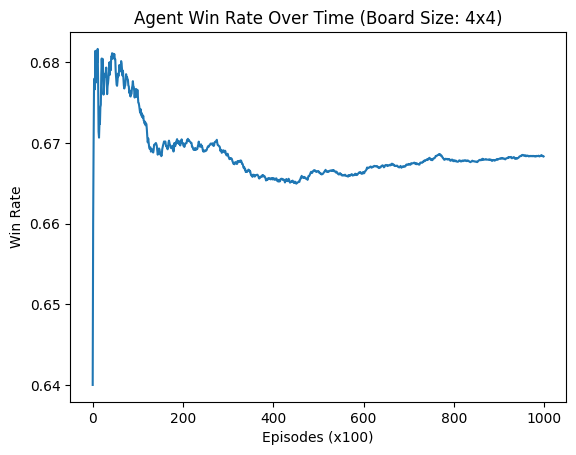

Episode 100: Win rate = 0.660
Episode 200: Win rate = 0.710
Episode 300: Win rate = 0.680
Episode 400: Win rate = 0.670
Episode 500: Win rate = 0.676
Episode 600: Win rate = 0.683
Episode 700: Win rate = 0.689
Episode 800: Win rate = 0.690
Episode 900: Win rate = 0.684
Episode 1000: Win rate = 0.685
Episode 1100: Win rate = 0.680
Episode 1200: Win rate = 0.683
Episode 1300: Win rate = 0.678
Episode 1400: Win rate = 0.683
Episode 1500: Win rate = 0.685
Episode 1600: Win rate = 0.686
Episode 1700: Win rate = 0.687
Episode 1800: Win rate = 0.681
Episode 1900: Win rate = 0.678
Episode 2000: Win rate = 0.682
Episode 2100: Win rate = 0.682
Episode 2200: Win rate = 0.680
Episode 2300: Win rate = 0.682
Episode 2400: Win rate = 0.682
Episode 2500: Win rate = 0.681
Episode 2600: Win rate = 0.678
Episode 2700: Win rate = 0.680
Episode 2800: Win rate = 0.679
Episode 2900: Win rate = 0.678
Episode 3000: Win rate = 0.681
Episode 3100: Win rate = 0.680
Episode 3200: Win rate = 0.679
Episode 3300: Win

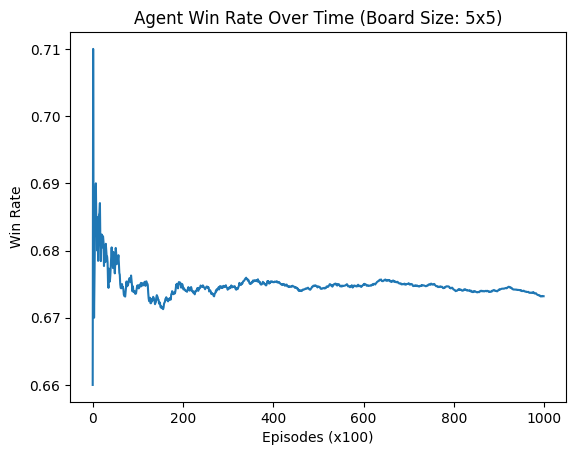

In [2]:
if __name__ == '__main__':

    agent_4x4 = LinearQApproximationAgent(BOARD_SIZE_4x4)
    win_rate_4x4 = agent_4x4.train(100000)
    
    # Plotting win rate\
    plot_win_rate(win_rate_4x4, BOARD_SIZE_4x4)

    # Train and plot for 5x5 board
    agent_5x5 = LinearQApproximationAgent(BOARD_SIZE_5x5)
    win_rates_5x5 = agent_5x5.train(100000)
    plot_win_rate(win_rates_5x5, BOARD_SIZE_5x5)
